In [81]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('./dataset/quora_questions.csv')

In [5]:
df.head(10)

Question
0  What is the step by step guide to invest in sh...
1  What is the story of Kohinoor (Koh-i-Noor) Dia...
2  How can I increase the speed of my internet co...
3  Why am I mentally very lonely? How can I solve...
4  Which one dissolve in water quikly sugar, salt...
5  Astrology: I am a Capricorn Sun Cap moon and c...
6                                Should I buy tiago?
7                     How can I be a good geologist?
8                    When do you use シ instead of し?
9  Motorola (company): Can I hack my Charter Moto...

## perform The Following
 1.spelling correction

 2.standard case,

 3.perform removal of non english words like corss language characters

In [6]:
df['doclen']=df['Question'].apply(lambda x: len(x.split()))

In [7]:
df.sort_values(by='doclen',ascending=False,inplace=True)

In [8]:
df.describe()

doclen
count  404289.000000
mean       10.942234
std         5.428808
min         1.000000
25%         7.000000
50%        10.000000
75%        13.000000
max       125.000000

In [9]:
filter1=df['doclen']>=20

In [10]:
df=df[filter1]

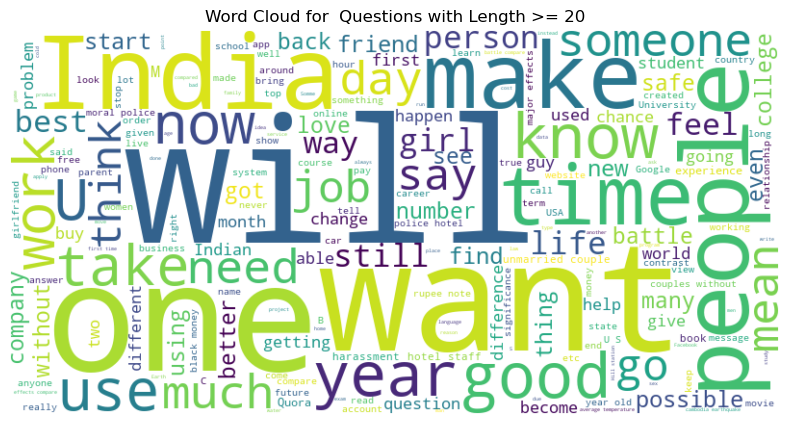

<Figure size 640x480 with 0 Axes>

In [87]:
text_to_visualize = ' '.join(df['Question'].values)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_to_visualize)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for  Questions with Length >= 20')
plt.show()
plt.savefig('EDA_Results/Question_length.png')

In [11]:
# df.to_csv('quora_questions_filtered.csv',index=False)

In [12]:
df.describe()

doclen
count  30735.000000
mean      24.733594
std        5.379956
min       20.000000
25%       21.000000
50%       23.000000
75%       27.000000
max      125.000000

In [13]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import spacy
import re
import matplotlib.pyplot as plt
from collections import Counter

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

import nltk
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siddharth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddharth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
import nltk
from nltk.tokenize import word_tokenize

# Ensure punkt is available
nltk.download('punkt_tab') 



[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\siddharth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
# Set of English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()

    words = word_tokenize(text)
    words = [word for word in words if word.isalnum() and word not in stop_words]

    words = [nlp(word)[0].lemma_ for word in words]
    print(words)
    corrected_words = [str(TextBlob(word).correct()) for word in words]

    normalized_words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in corrected_words]
    return ' '.join(normalized_words)


def visualize_word_distribution(original, preprocessed):
    original_words = Counter(word_tokenize(' '.join(original)))
    preprocessed_words = Counter(word_tokenize(' '.join(preprocessed)))

    original_counts = dict(original_words.most_common(10))
    preprocessed_counts = dict(preprocessed_words.most_common(10))

    df_counts = pd.DataFrame({
        'Original': original_counts,
        'Preprocessed': preprocessed_counts
    }).fillna(0)

    df_counts.plot(kind='bar', figsize=(12, 6))
    plt.title('Top 10 Words Before and After Preprocessing')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

In [16]:
df['Question']

35101     Like everyone else (here in U.S), I work with ...
401274    Hello dear's people. i have a fictief research...
33209     A lady buys goods worth 200 bucks from a shop ...
355197    I am turning 25 in about a month and am curren...
402355    I'm a 34 years old married to a woman. I had a...
                                ...                        
300426    Are there any records of which reactions did T...
326552    Is the project to build the Shivsmarak (Chhatr...
25649     Are the Indian soldiers sold by ministers on b...
75873     If I hit my pool ball first but make the other...
324784    How do you view the Indian government's decisi...
Name: Question, Length: 30735, dtype: object

In [17]:
documents = list(df['Question'])

## This Step is Very Time Consumed which is executed and results have been stroed in the file called preprocessed.csv use this file and continue next steps

In [ ]:

# skip if you already have the preprocessed documents
documents=[text.lower() for text in documents]
print("len=",len(documents))
newDocuments=[]
for idx,text in enumerate(documents):
    print("idx=",idx)
    words = word_tokenize(text)
    words = [word for word in words if word.isalnum() and word not in stop_words]
    words = [nlp(word)[0].lemma_ for word in words]
    corrected_words = [str(TextBlob(word).correct()) for word in words]
    normalized_words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in corrected_words]
    newDocuments.append(' '.join(normalized_words))

len= 30735
idx= 0
idx= 1
idx= 2
idx= 3
idx= 4
idx= 5
idx= 6
idx= 7
idx= 8
idx= 9
idx= 10
idx= 11
idx= 12
idx= 13
idx= 14
idx= 15
idx= 16
idx= 17
idx= 18
idx= 19
idx= 20
idx= 21
idx= 22
idx= 23
idx= 24
idx= 25
idx= 26
idx= 27
idx= 28
idx= 29
idx= 30
idx= 31
idx= 32
idx= 33
idx= 34
idx= 35
idx= 36
idx= 37
idx= 38
idx= 39
idx= 40
idx= 41
idx= 42
idx= 43
idx= 44
idx= 45
idx= 46
idx= 47
idx= 48
idx= 49
idx= 50
idx= 51
idx= 52
idx= 53
idx= 54
idx= 55
idx= 56
idx= 57
idx= 58
idx= 59
idx= 60
idx= 61
idx= 62
idx= 63
idx= 64
idx= 65
idx= 66
idx= 67
idx= 68
idx= 69
idx= 70
idx= 71
idx= 72
idx= 73
idx= 74
idx= 75
idx= 76
idx= 77
idx= 78
idx= 79
idx= 80
idx= 81
idx= 82
idx= 83
idx= 84
idx= 85
idx= 86
idx= 87
idx= 88
idx= 89
idx= 90
idx= 91
idx= 92
idx= 93
idx= 94
idx= 95
idx= 96
idx= 97
idx= 98
idx= 99
idx= 100
idx= 101
idx= 102
idx= 103
idx= 104
idx= 105
idx= 106
idx= 107
idx= 108
idx= 109
idx= 110
idx= 111
idx= 112
idx= 113
idx= 114
idx= 115
idx= 116
idx= 117
idx= 118
idx= 119
idx= 120
idx= 121
i

In [20]:
# df['preprocessed']=newDocuments

In [22]:
# df.to_csv('./preprocessed.csv')

In [18]:
df=pd.read_csv('./preprocessed.csv')
df.drop(columns='Unnamed: 0',inplace=True)   

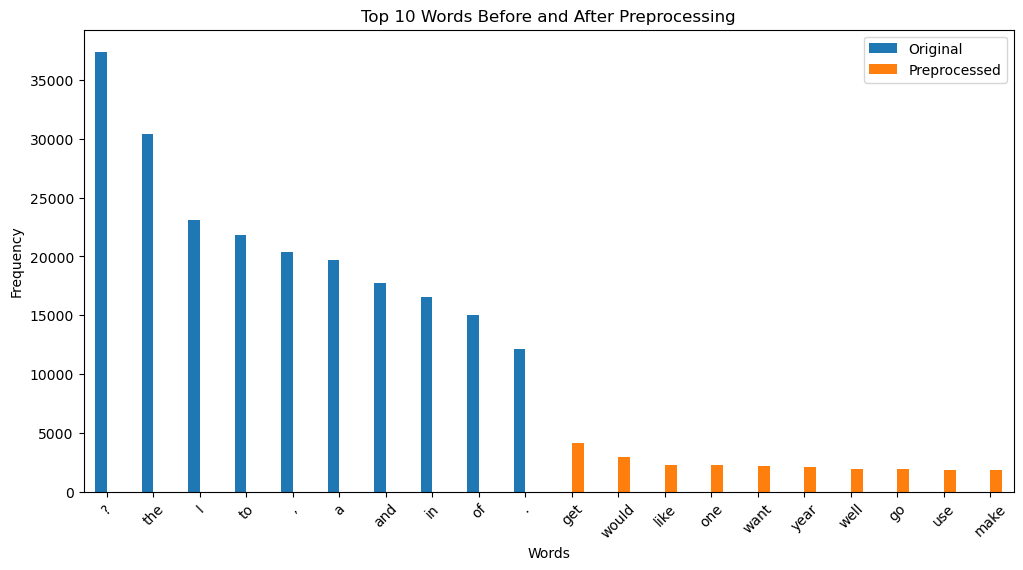

In [19]:

# Visualize word distribution
visualize_word_distribution(df['Question'], df['preprocessed'])

## Topic Modeling on the Preprocessed.csv as follows
1. Lda 
2. NMF
3. Bert Topic

In [40]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import math

In [32]:
documents=list(df['preprocessed'])

In [62]:
class myLdaTopicModeling:
    def __init__(self,documents,n_topics=5):
        self.documents=documents
        self.n_topics=n_topics
        self.vectorizer=None
        self.doc_term_matrix=None
        self.lda=None

    def fit(self):
        self.vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
        self.doc_term_matrix = self.vectorizer.fit_transform(self.documents)
    def train(self):
        self.lda = LatentDirichletAllocation(n_components=self.n_topics, random_state=42)
        self.lda.fit(self.doc_term_matrix)
    def display_topics(self,n_words=10):
        for index, topic in enumerate(self.lda.components_):
            print(f'Top 10 words for topic #{index}:')
            print([self.vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]])
            print('\n')
    def visualize_topics(self, save_path, n_words=30):
        # Create and save word cloud visualizations for each topic
       
        num_topics = self.n_topics
        num_cols = 3  # Number of columns in the grid
        num_rows = math.ceil(num_topics / num_cols)  # Calculate number of rows
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
        axes = axes.flatten()

        for index, topic in enumerate(self.lda.components_):
            top_words = {self.vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[-n_words:]}
            wordcloud = WordCloud(width=800, height=400, background_color='black',  colormap='Set2',collocations=False).generate_from_frequencies(top_words)

            axes[index].imshow(wordcloud, interpolation='bilinear')
            axes[index].axis('off')
            axes[index].set_title(f'Topic #{index}')

        # Hide unused subplots
        for i in range(len(axes)):
            if i >= num_topics:
                axes[i].axis('off')

        plt.tight_layout()
        plt.savefig(save_path)
        plt.show()
        print(f"Topic visualization saved as '{save_path}'")   
    
    def calculate_coherence_score(self, n_words=10):
        
        topics = []
        for topic in self.lda.components_:
            top_words = [self.vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]]
            topics.append(top_words)
        tokenized_documents = [doc.split() for doc in self.documents]
        dictionary = Dictionary(tokenized_documents)
        corpus = [dictionary.doc2bow(text) for text in tokenized_documents]
        # Calculate the coherence score
        coherence_model = CoherenceModel(topics=topics, texts=tokenized_documents, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        print(f"C_V Coherence Score: {coherence_score}")
        return coherence_score      

In [63]:
myLdaObj=myLdaTopicModeling(documents,n_topics=7)

In [64]:
myLdaObj.fit()
myLdaObj.train()

In [52]:
myLdaObj.display_topics(n_words=30)


Top 10 words for topic #0:
['chance', 'invest', 'law', 'card', 'happen', 'way', 'pay', 'donald', 'vote', 'term', 'president', 'tax', 'state', 'great', 'cold', 'car', 'drive', 'significance', 'change', 'temperature', 'lake', 'contrast', 'city', 'make', 'tramp', 'india', 'average', 'desert', 'battle', 'compare']


Top 10 words for topic #1:
['parent', 'marry', 'woman', 'degree', 'month', 'child', 'think', 'day', 'school', 'know', 'engineering', 'time', 'start', 'india', 'college', 'make', 'university', 'experience', 'live', 'student', 'good', 'job', 'old', 'feel', 'work', 'life', 'like', 'people', 'want', 'year']


Top 10 words for topic #2:
['need', 'charge', 'old', 'lawton', 'run', 'weight', 'date', 'andros', 'play', 'mobile', 'start', 'way', 'lose', 'long', 'make', 'video', 'new', 'password', 'day', 'learn', 'work', 'card', 'buy', 'want', 'email', 'number', 'pp', 'account', 'phone', 'use']


Top 10 words for topic #3:
['face', 'hand', 'like', 'army', 'day', 'political', 'watch', 'lice

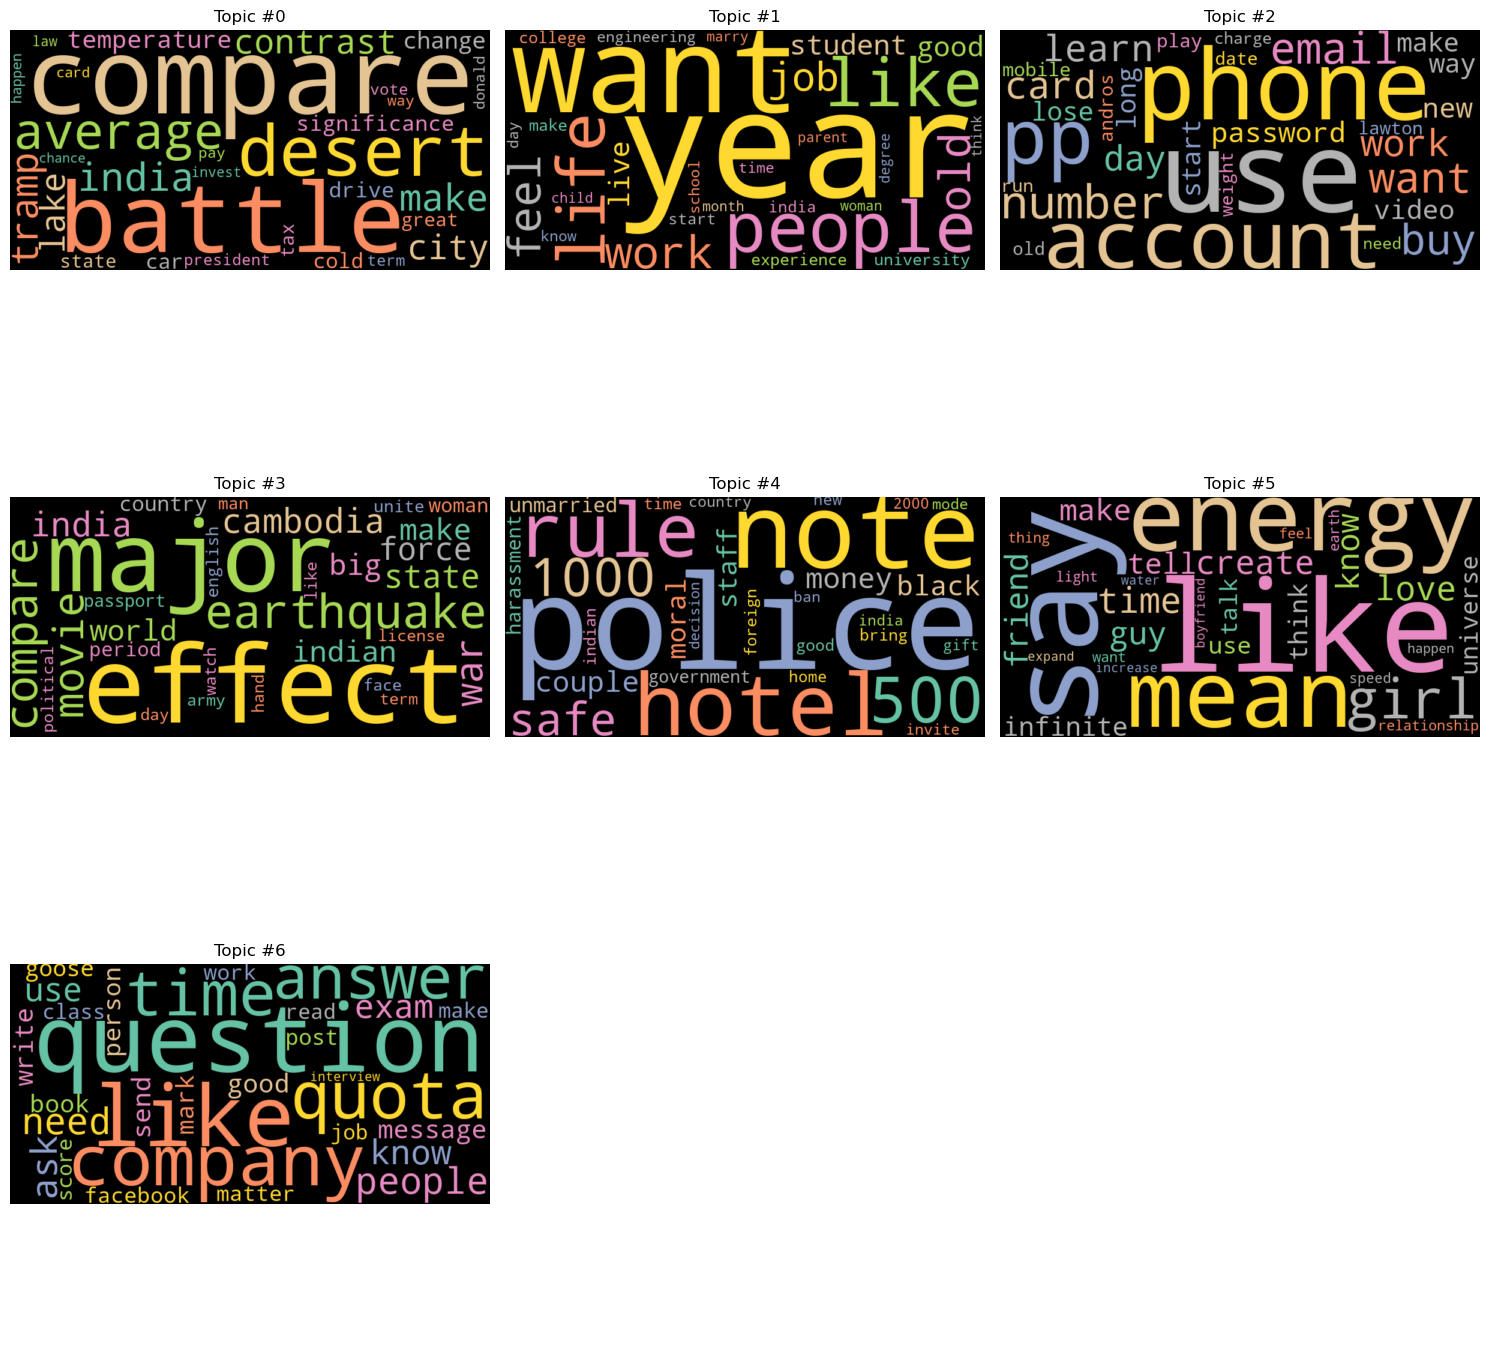

Topic visualization saved as 'EDA_Results/LDA_Topics.png'


In [65]:
myLdaObj.visualize_topics(save_path='EDA_Results/LDA_Topics.png',n_words=30)

In [23]:
def SaveTopicsToFile(model, cv, n_words, file_name,title):
    with open(file_name, 'w') as f:
        f.write(title + '\n\n')
        for index, topic in enumerate(model.components_):
            f.write(f"The top {n_words} words for topic #{index}:\n")
            top_words = [cv.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]]
            f.write(', '.join(top_words) + '\n\n')
    print(f"Topics have been successfully saved to {file_name}")

In [24]:
import pickle

def SaveModel(model, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {file_name}")

In [25]:
SaveTopicsToFile(myLdaObj.lda, myLdaObj.vectorizer, 20, 'topics_Preprocessed_Data_7.txt','preprocessed data with data length greter than 20 and total topics 6')

Topics have been successfully saved to topics_Preprocessed_Data_7.txt


In [26]:
candidate_labels = [
    "Government",
    "employment",
    "Social media",
    "Relationships",
    "Space and Science",
    "Exam and university",
    "carrer",
    "Education",
    "student Life",
    "General",
    "Technology",
    "Politics",
]

In [27]:
from transformers import pipeline

# Load a text classification model (you can choose a specific model for your needs)
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

def generate_label(words,candidate_labels):
    input_text = f"Words: {', '.join(words)}"
    
    
    # Candidate labels to guide classification, this can be modified based on common topics in your data

    generated = classifier(input_text, candidate_labels=candidate_labels)
    
    # Return the top label
    return generated['labels'][0]

In [208]:
topic_to_label = {}
for index, topic in enumerate(myLdaObj.lda.components_):
    top_words = [myLdaObj.vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-50:]]
    print(f"Topic {index}",top_words)
    label = generate_label(top_words, candidate_labels)
    print(f"Topic {index} is about {label}")
    topic_to_label[index] = label

Topic 0 ['difference', 'pass', 'history', 'attraction', 'food', 'use', 'capital', 'win', 'probability', 'real', 'eat', 'apply', 'sharp', 'edmonton', 'person', 'auckland', 'green', 'indian', 'income', 'election', 'chance', 'invest', 'law', 'card', 'happen', 'way', 'pay', 'donald', 'vote', 'term', 'president', 'tax', 'state', 'great', 'cold', 'car', 'drive', 'significance', 'change', 'temperature', 'lake', 'contrast', 'city', 'make', 'tramp', 'india', 'average', 'desert', 'battle', 'compare']
Topic 0 is about carrer
Topic 1 ['need', 'graduate', 'company', 'plan', 'leave', 'look', 'apply', 'master', 'career', 'course', 'business', 'friend', 'family', 'money', 'age', 'ms', 'study', 'come', 'man', 'science', 'parent', 'marry', 'woman', 'degree', 'month', 'child', 'think', 'day', 'school', 'know', 'engineering', 'time', 'start', 'india', 'college', 'make', 'university', 'experience', 'live', 'student', 'good', 'job', 'old', 'feel', 'work', 'life', 'like', 'people', 'want', 'year']
Topic 1 is

```I have notice the spelling correction has greatly influced the model in wrong way beacuse some of the text comes from a specific part of word and the vocabulary might be diffrent which got overriden by spelliing corrections hence i have trained model without the spelling correction```

In [32]:
documents=list(df['Question'])

In [68]:
myLdaObj_2=myLdaTopicModeling(documents,n_topics=6)

In [69]:
myLdaObj_2.fit()
myLdaObj_2.train()

In [56]:
myLdaObj_2.display_topics(n_words=30)

Top 10 words for topic #0:
['exam', 'college', 'pay', 'follow', 'come', 'question', 'tax', 'block', 'great', 'way', 'car', 'cold', 'need', 'india', 'city', 'drive', 'significance', 'temperature', 'contrast', 'mark', 'person', 'lake', 'change', 'send', 'message', 'make', 'average', 'desert', 'battle', 'compare']


Top 10 words for topic #1:
['really', 'person', 'look', 'good', 'month', 'talk', 'thing', 'live', 'woman', 'man', 'work', 'guy', 'tell', 'day', 'think', 'start', 'love', 'friend', 'say', 'make', 'old', 'time', 'know', 'life', 'girl', 'feel', 'people', 'like', 'want', 'year']


Top 10 words for topic #2:
['product', 'code', 'video', 'know', 'online', 'long', 'way', 'password', 'need', 'facebook', 'webster', 'company', 'new', 'goose', 'make', 'like', 'day', 'start', 'date', 'learn', 'card', 'work', 'email', 'buy', 'want', 'pp', 'number', 'account', 'phone', 'use']


Top 10 words for topic #3:
['job', 'political', 'like', 'read', 'hand', 'month', 'join', 'passport', 'america', 'e

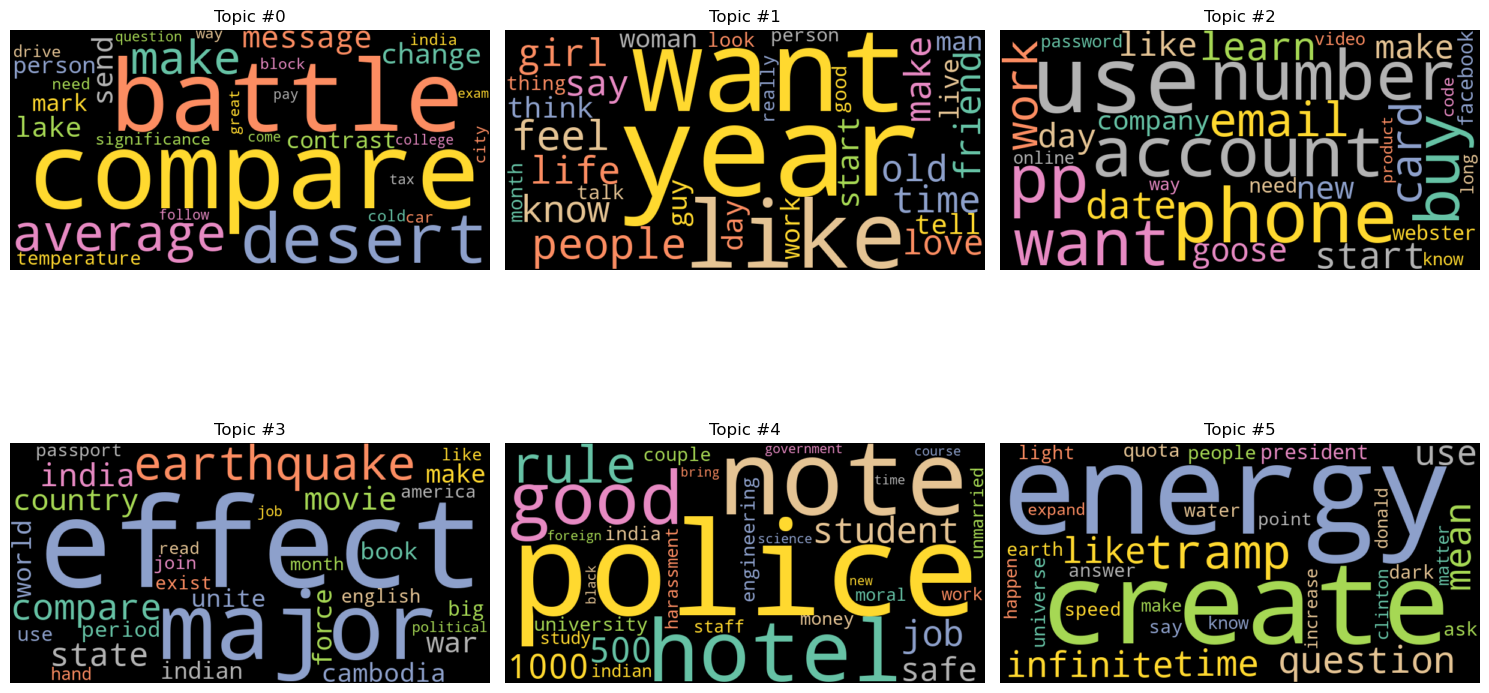

Topic visualization saved as 'EDA_Results/LDA_Topics2.png'


In [70]:
myLdaObj_2.visualize_topics(save_path='EDA_Results/LDA_Topics2.png',n_words=30)

In [36]:
topic_to_label = {}
for index, topic in enumerate(myLdaObj_2.lda.components_):
    top_words = [myLdaObj_2.vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-30:]]
    print(f"Topic {index}",top_words)
    label = generate_label(top_words, candidate_labels)
    print(f"Topic {index} is about {label}")
    topic_to_label[index] = label

Topic 0 ['currency', 'number', 'note', 'gobi', 'use', 'did', 'temperatures', 'modi', 'decision', 'cold', '2000', 'phone', 'india', 'does', 'government', 'indian', 'compare', 'ones', 'math', 'rupee', 'average', 'new', 'card', 'rs', 'desert', 'money', 'black', '1000', '500', 'notes']
Topic 0 is about Government
Topic 1 ['time', 'website', 'don', 'google', 'years', 'money', 'pay', 'using', 'data', 'working', 'know', 'new', 'good', 'does', 'people', 'app', 'learn', 'online', 'make', 'work', 'buy', 'india', 'best', 'use', 'company', 'need', 'business', 'start', 'want', 'like']
Topic 1 is about Technology
Topic 2 ['phone', 'sent', 'movie', 'message', 'mean', 'don', 'whatsapp', 'hill', 'number', 'like', 'station', 'cambodia', 'instagram', 'facebook', 'password', 'email', 'harassment', 'couples', 'unmarried', 'moral', 'staff', 'major', 'compare', 'safe', 'earthquake', 'account', 'effects', 'does', 'hotel', 'police']
Topic 2 is about Social media
Topic 3 ['say', 'really', 'girlfriend', 'friends

## Now Use The Lda model and assign the topic id and topic name for all the question in the dataframe


In [37]:
topic_results=myLdaObj_2.lda.transform(myLdaObj_2.doc_term_matrix)


In [38]:
topic_results[0]

array([0.21629105, 0.19022604, 0.0034587 , 0.53825843, 0.04832865,
       0.00343713])

In [39]:
topic_results[0].argmax()

3

```Lets Assign the topic id for the first Question and check if the label is relevant```

In [40]:
document=documents[0]
document

'Like everyone else (here in U.S), I work with a group of people I see and interact with every day. As a human rights advocate and Lesbian, my views are liberal and I by no means preach my beliefs in my work place. However, I want to know, when is it OK to state your opinions on an issue. For example, if someone mentions that their next door neighbor, who happens to be a 12 year old boy, was playing with dolls and that "this is going down the wrong road and he is strange/weird", is it OK for me to say that we shouldn\'t judge him for who he is? So confused... This just happened at lunch and I am very upset about it...'

In [41]:
topic_to_label[topic_results[0].argmax()]

'Relationships'

In [42]:
# adding Topic label for the dataframe
df['TopicId']=topic_results.argmax(axis=1)
df['Topic'] = [topic_to_label[topic.argmax()] for topic in topic_results]
df.head(20)

Question  doclen  \
0   Like everyone else (here in U.S), I work with ...     125   
1   Hello dear's people. i have a fictief research...      80   
2   A lady buys goods worth 200 bucks from a shop ...      77   
3   I'm a 34 years old married to a woman. I had a...      73   
4   I am turning 25 in about a month and am curren...      73   
5   My employer has told me that we can not accept...      72   
6   I have been using my girlfriend for a sexual r...      71   
7   You have 100 coins laying flat on a table, eac...      68   
8   I broke up with him. I love him so much but we...      68   
9   I broke up with him. I love him so much but we...      68   
10  I feel like I'm getting over my crush. This fe...      67   
11  How often should I massage my face with Argan ...      66   
12  I had a college friend with whom I used to tal...      66   
13  I live with my mom and we are always arguing a...      65   
14  I live with my mom and we are always arguing a...      65   
15  I live with my mom and we are always arguing a...      65   
16  My gf cheated on me with her ex and I stayed w...      64   
17  Your advice will HELP me! I think I should go ...      64   
18  I belong to OBC. My CTC is 7 lacs per annum bu...      64   
19  What is the cost of a LTE Base station (eNodeB...      64   

                                         preprocessed  TopicId  \
0   like everyone else work group people see inter...        3   
1   hello dear people fiction research quest someo...        4   
2   lady buy good worth 200 buck shop assume shopk...        3   
3   34 year old marry woman affair 12 year male fr...        3   
4   turn 25 month currently question life degree a...        5   
5   employer tell accept tip however make seem lik...        1   
6   use girlfriend sexual relationship last year l...        3   
7   100 coin lay flat table head side tail side 10...        4   
8   break love much can together love lot miss muc...        3   
9   break love much can together love lot miss muc...        3   
10  feel like get crush feel come upon random yest...        3   
11  often massage face organ oil apparently organ ...        1   
12  college friend use talk normally one day fight...        3   
13  live mon always argue always blame thing never...        3   
14  live mon always argue always blame thing never...        3   
15  live mon always argue always blame thing never...        3   
16  of cheat ex stay say want love still talk ex w...        3   
17  advice help think go abroad ms establish good ...        3   
18  belong obs etc 7 law per anna father retire go...        5   
19  cost let base station ended micro cell cost am...        4   

                  Topic  
0         Relationships  
1                carrer  
2         Relationships  
3         Relationships  
4   Exam and university  
5            Technology  
6         Relationships  
7                carrer  
8         Relationships  
9         Relationships  
10        Relationships  
11           Technology  
12        Relationships  
13        Relationships  
14        Relationships  
15        Relationships  
16        Relationships  
17        Relationships  
18  Exam and university  
19               carrer

In [43]:
df.to_csv('Lda_topics_latest.csv')

In [44]:
def vizualize_topic_distribution(Topics):
    Topics.value_counts().plot(kind='bar', figsize=(12, 6))
    plt.title('Topic Distribution')
    plt.xlabel('Topics')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

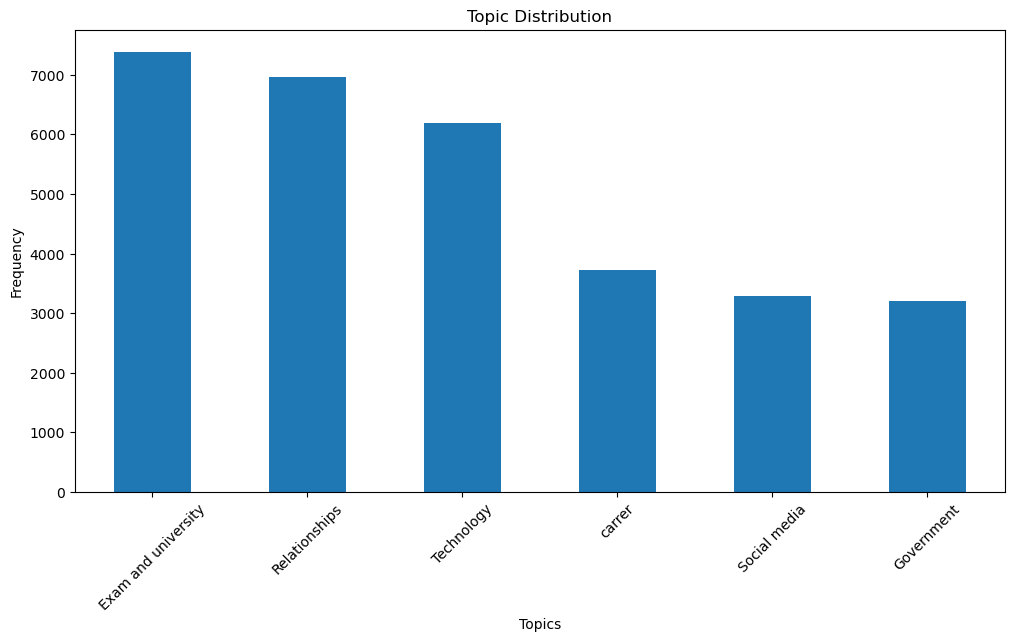

In [45]:
vizualize_topic_distribution(df['Topic'])

In [46]:
coherence_score = myLdaObj_2.calculate_coherence_score(n_words=30)

C_V Coherence Score: 0.449073428816778


# lets now train Topic Modeling using NMF

In [72]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

documents = list(df['preprocessed'])

class NMF_Classifier:
    def __init__(self,n_topics=10):
        self.n_topics=n_topics
        self.vectorizer=None
        self.document_term_frequency=None
        self.nmf=None
    def fit(self,documents):
        self.vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
        self.document_term_frequency = self.vectorizer.fit_transform(documents)
    def train(self):
        self.nmf = NMF(n_components=self.n_topics, random_state=42)
        self.nmf.fit(self.document_term_frequency)
    def display_topics(self,n_words=20):
        for index, topic in enumerate(self.nmf.components_):
            print(f'Top 20 words for topic #{index}:')
            print([self.vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]][::-1])
            print('\n')
    def get_top_n_words(self,n_words=20):
        topics=[]
        for index, topic in enumerate(self.nmf.components_):
            topics.append([self.vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]][::-1])
        return topics
    def visualize_topics(self, save_path, n_words=20):
        num_topics = self.n_topics
        num_cols = 3  # Number of columns in the grid
        num_rows = math.ceil(num_topics / num_cols)  # Calculate number of rows

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
        axes = axes.flatten()

        for index, topic in enumerate(self.nmf.components_):
            top_words = {self.vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[-n_words:][::-1]}
            wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Set2',collocations=False).generate_from_frequencies(top_words)

            axes[index].imshow(wordcloud, interpolation='bilinear')
            axes[index].axis('off')
            axes[index].set_title(f'Topic #{index}')

        # Hide unused subplots
        for i in range(len(axes)):
            if i >= num_topics:
                axes[i].axis('off')

        plt.tight_layout()
        plt.savefig(save_path)
        plt.show()
        print(f"Topic visualization saved as '{save_path}'")

    
    def calculate_coherence_score(self, documents, n_words=20):
        topics = self.get_top_n_words(n_words=n_words)
        tokenized_documents = [doc.split() for doc in documents]
        dictionary = Dictionary(tokenized_documents)
        corpus = [dictionary.doc2bow(text) for text in tokenized_documents]
        coherence_model = CoherenceModel(topics=topics, texts=tokenized_documents, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        print(f"C_V Coherence Score: {coherence_score}")
        return coherence_score





In [73]:
nmf_classifier=NMF_Classifier(n_topics=10)
nmf_classifier.fit(documents)

In [74]:
nmf_classifier.train()

In [75]:
nmf_classifier.display_topics(n_words=30)

Top 20 words for topic #0:
['police', 'hotel', 'safe', 'couple', 'staff', 'unmarried', 'moral', 'harassment', 'hill', 'nallamala', 'pure', 'ananthagiri', 'shield', 'kolkata', 'booty', 'canal', 'srinagar', 'deal', 'allahabad', 'darjeele', 'dharamshala', 'shilling', 'near', 'awake', 'valley', 'azamgarh', 'vythiri', 'khowai', 'kurseong', 'jabalpur']


Top 20 words for topic #1:
['like', 'feel', 'know', 'girl', 'friend', 'guy', 'say', 'mean', 'company', 'look', 'think', 'tell', 'love', 'work', 'thing', 'talk', 'really', 'facebook', 'india', 'life', 'student', 'user', 'university', 'person', 'day', 'relationship', 'woman', 'live', 'school', 'boyfriend']


Top 20 words for topic #2:
['effect', 'earthquake', 'compare', 'major', 'cambodia', 'desert', 'island', 'average', 'temperature', 'sanriku', 'cold', 'lake', '1957', 'andreanof', '1611', '1922', 'vallenar', 'cascade', '1700', '1963', 'kiril', '2011', 'took', '1746', 'sea', 'band', 'great', '1938', 'term', 'drive']


Top 20 words for topic #

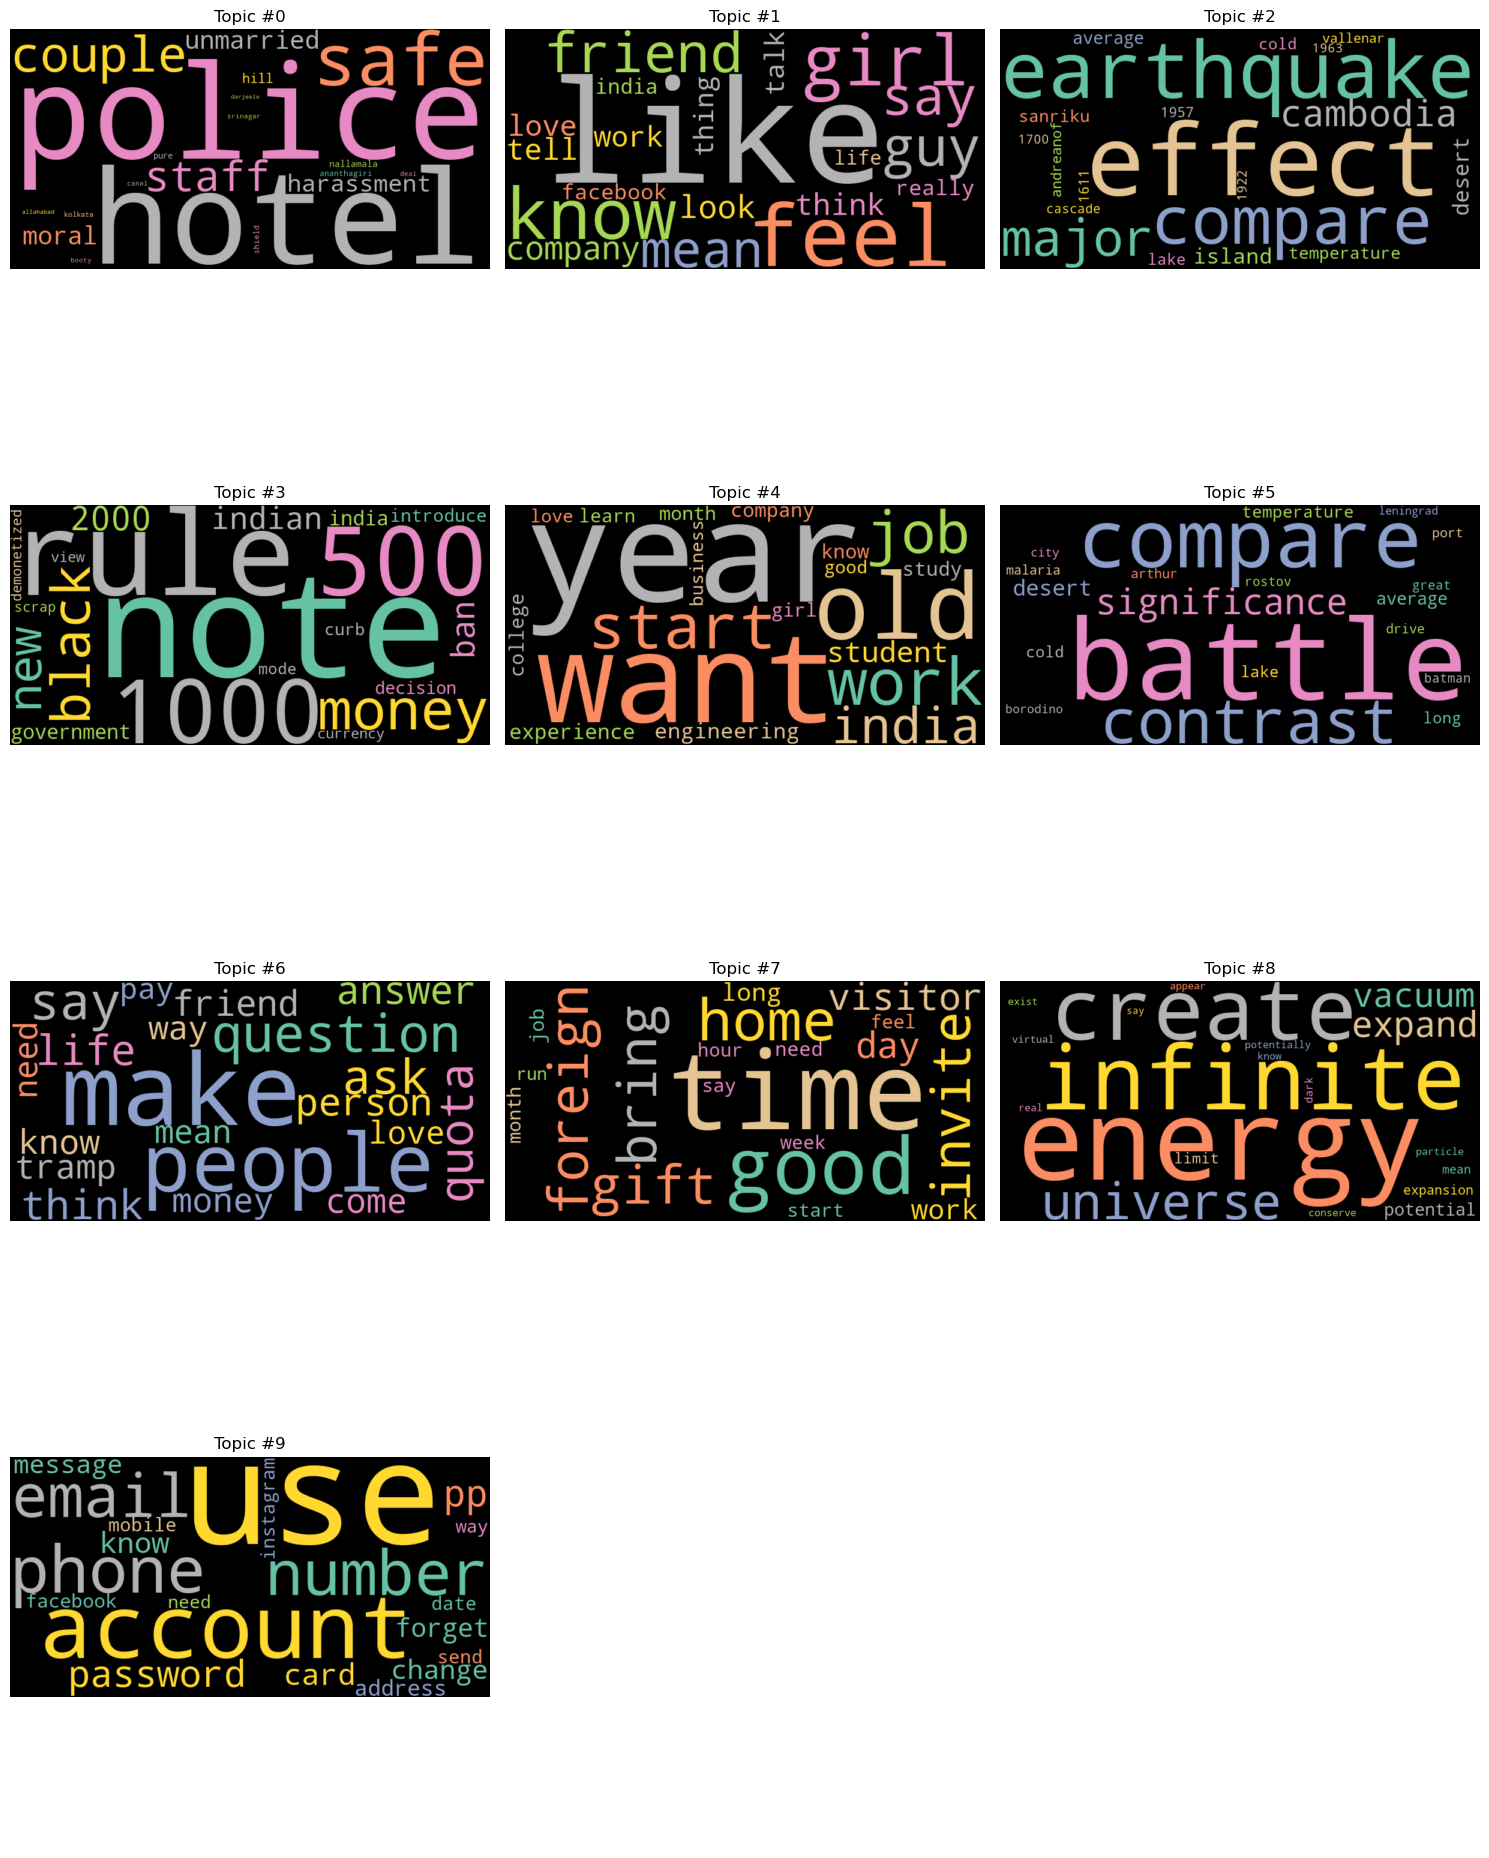

Topic visualization saved as 'EDA_Results/NMF_Topics'


In [76]:
nmf_classifier.visualize_topics(save_path='EDA_Results/NMF_Topics', n_words=20)

In [77]:
labels=[
 "Government",
    "Online Business",
    "Social Harassment",
    "Relationships",
    "cosmology and physics",
    "Exam and university",
    "carrer",
    "Education",
    "Mathematics",
    "Accommodation",
    "Historical Battles",
    "Geological and Environmental Effects",
    " Water Comparisons",
    "Social Media",
    ]

In [53]:
nmf_topics=nmf_classifier.get_top_n_words(n_words=30)
topic_to_label = {}
for index, topic in enumerate(nmf_topics):
    top_words=topic[:30]
    print(f"Topic {index}",top_words)
    label = generate_label(top_words, labels)
    print(f"Topic {index} is about {label}")
    topic_to_label[index] = label

Topic 0 ['police', 'hotel', 'safe', 'couple', 'staff', 'unmarried', 'moral', 'harassment', 'hill', 'nallamala', 'pure', 'ananthagiri', 'shield', 'kolkata', 'booty', 'canal', 'srinagar', 'deal', 'allahabad', 'darjeele', 'dharamshala', 'shilling', 'near', 'awake', 'valley', 'azamgarh', 'vythiri', 'khowai', 'kurseong', 'jabalpur']
Topic 0 is about Accommodation
Topic 1 ['like', 'feel', 'know', 'girl', 'friend', 'guy', 'say', 'mean', 'company', 'look', 'think', 'tell', 'love', 'work', 'thing', 'talk', 'really', 'facebook', 'india', 'life', 'student', 'user', 'university', 'person', 'day', 'relationship', 'woman', 'live', 'school', 'boyfriend']
Topic 1 is about Relationships
Topic 2 ['effect', 'earthquake', 'compare', 'major', 'cambodia', 'desert', 'island', 'average', 'temperature', 'sanriku', 'cold', 'lake', '1957', 'andreanof', '1611', '1922', 'vallenar', 'cascade', '1700', '1963', 'kiril', '2011', 'took', '1746', 'sea', 'band', 'great', '1938', 'term', 'drive']
Topic 2 is about  Water C

In [54]:
topic_to_label

{0: 'Accommodation',
 1: 'Relationships',
 2: ' Water Comparisons',
 3: 'Government',
 4: 'Education',
 5: 'Historical Battles',
 6: 'carrer',
 7: 'Accommodation',
 8: 'Mathematics',
 9: 'Social Media'}

In [55]:
topic_results=nmf_classifier.nmf.transform(nmf_classifier.document_term_frequency)


In [56]:
df['TopicId_NMF']=topic_results.argmax(axis=1)
df['Topic_NMF'] = [topic_to_label[topic.argmax()] for topic in topic_results]

In [57]:
df.loc[:,['Question','doclen','preprocessed','TopicId_NMF','Topic_NMF']].head(20)

Question  doclen  \
0   Like everyone else (here in U.S), I work with ...     125   
1   Hello dear's people. i have a fictief research...      80   
2   A lady buys goods worth 200 bucks from a shop ...      77   
3   I'm a 34 years old married to a woman. I had a...      73   
4   I am turning 25 in about a month and am curren...      73   
5   My employer has told me that we can not accept...      72   
6   I have been using my girlfriend for a sexual r...      71   
7   You have 100 coins laying flat on a table, eac...      68   
8   I broke up with him. I love him so much but we...      68   
9   I broke up with him. I love him so much but we...      68   
10  I feel like I'm getting over my crush. This fe...      67   
11  How often should I massage my face with Argan ...      66   
12  I had a college friend with whom I used to tal...      66   
13  I live with my mom and we are always arguing a...      65   
14  I live with my mom and we are always arguing a...      65   
15  I live with my mom and we are always arguing a...      65   
16  My gf cheated on me with her ex and I stayed w...      64   
17  Your advice will HELP me! I think I should go ...      64   
18  I belong to OBC. My CTC is 7 lacs per annum bu...      64   
19  What is the cost of a LTE Base station (eNodeB...      64   

                                         preprocessed  TopicId_NMF  \
0   like everyone else work group people see inter...            4   
1   hello dear people fiction research quest someo...            7   
2   lady buy good worth 200 buck shop assume shopk...            3   
3   34 year old marry woman affair 12 year male fr...            4   
4   turn 25 month currently question life degree a...            4   
5   employer tell accept tip however make seem lik...            6   
6   use girlfriend sexual relationship last year l...            9   
7   100 coin lay flat table head side tail side 10...            9   
8   break love much can together love lot miss muc...            9   
9   break love much can together love lot miss muc...            9   
10  feel like get crush feel come upon random yest...            1   
11  often massage face organ oil apparently organ ...            9   
12  college friend use talk normally one day fight...            1   
13  live mon always argue always blame thing never...            4   
14  live mon always argue always blame thing never...            4   
15  live mon always argue always blame thing never...            4   
16  of cheat ex stay say want love still talk ex w...            7   
17  advice help think go abroad ms establish good ...            7   
18  belong obs etc 7 law per anna father retire go...            4   
19  cost let base station ended micro cell cost am...            9   

        Topic_NMF  
0       Education  
1   Accommodation  
2      Government  
3       Education  
4       Education  
5          carrer  
6    Social Media  
7    Social Media  
8    Social Media  
9    Social Media  
10  Relationships  
11   Social Media  
12  Relationships  
13      Education  
14      Education  
15      Education  
16  Accommodation  
17  Accommodation  
18      Education  
19   Social Media

In [58]:
df.loc[:,['Question','doclen','preprocessed','TopicId_NMF','Topic_NMF']].to_csv('NMF_topics_latest.csv',index=False)

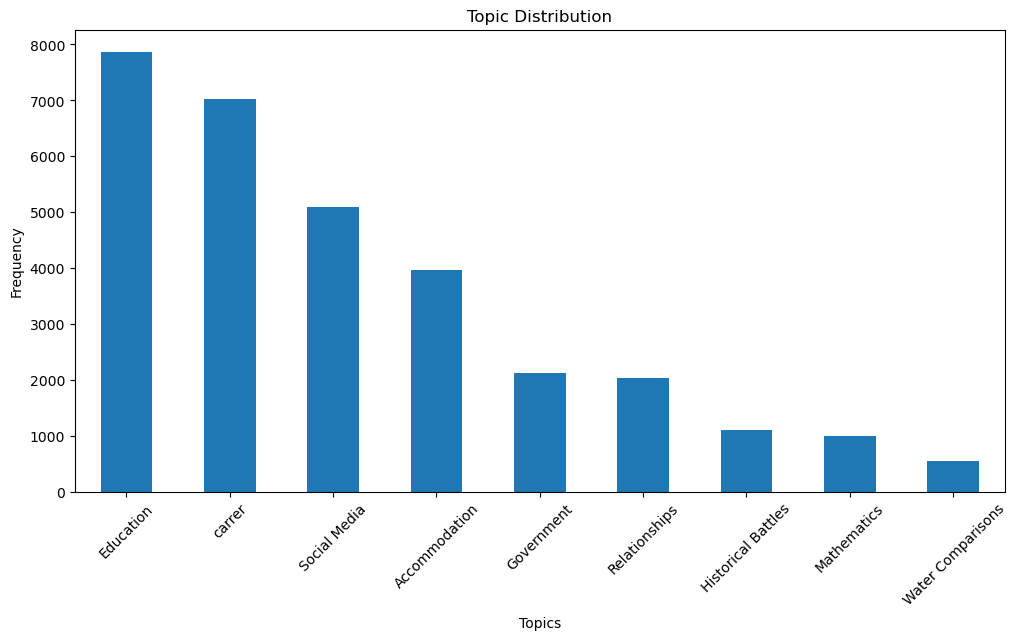

In [59]:
vizualize_topic_distribution(df['Topic_NMF'])

In [60]:
coherence_score = nmf_classifier.calculate_coherence_score(documents, n_words=30)

C_V Coherence Score: 0.4556466052232867


# Now lets proceed with training the BertTopic Model

My Observation for the BertTopic
unlike the other two this model would find how many topic can be possible based upon the ability to find coherence and any similarity thus this can give dynamic topics given various hyperparameters and performs hyperparameter tuning to find the best hyperparameters, here i have gave max topics which then find aht will be the best generalizaed or granual topic and then performs topics modeling

This Model also makes use of n_gram paramers thus providing a range of n_grams to best suitable topic for  given various hyperparameters

In [20]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

# Load your dataset
documents = list(df['preprocessed'])

In [62]:
model = SentenceTransformer('all-MiniLM-L6-v2')  
embeddings = model.encode(documents, show_progress_bar=True)

Batches:   0%|          | 0/961 [00:00<?, ?it/s]

In [ ]:
num_topics = 8
topic_model = BERTopic(nr_topics=num_topics,n_gram_range=(5,50), min_topic_size= 20,top_n_words=20)

topics, probs = topic_model.fit_transform(documents, embeddings)


MemoryError: 

This Model also provides the options for visually see the topics and find any overlaping topic which can be further broken down or combined as per our needs

In [240]:
print(topic_model.get_topics())
topic_model.visualize_topics()

{-1: [('police hotel staff moral police', 0.00013277036907857574), ('safe unmarried couple without harassment', 0.00013277036907857574), ('unmarried couple without harassment police hotel staff moral', 0.00013277036907857574), ('without harassment police hotel staff moral', 0.00013277036907857574), ('without harassment police hotel staff moral police', 0.00013277036907857574), ('harassment police hotel staff moral', 0.00013277036907857574), ('without harassment police hotel staff', 0.00013277036907857574), ('couple without harassment police hotel staff moral police', 0.00013277036907857574), ('couple without harassment police hotel staff moral', 0.00013277036907857574), ('couple without harassment police hotel staff', 0.00013277036907857574), ('couple without harassment police hotel', 0.00013277036907857574), ('unmarried couple without harassment police hotel staff moral police', 0.00013277036907857574), ('harassment police hotel staff moral police', 0.00013277036907857574), ('unmarrie

In [241]:
topicsDocs=[]
for topic_num in set(topics):
    if topic_num == -1:
        continue 
    top_words = topic_model.get_topic(topic_num) 
    print(f"Topic {topic_num}:")
    for word, score in top_words[:]:
        print(f"  {word}: {score:.4f}")
    doc=" ".join([ word for word, score in top_words])

    topicsDocs.append([doc,topic_num])
    print("\n")

Topic 0:
  harassment police hotel staff moral police: 0.0003
  couple without harassment police hotel: 0.0003
  would safe unmarried couple without harassment police hotel staff moral police: 0.0003
  harassment police hotel staff moral: 0.0003
  without harassment police hotel staff moral: 0.0003
  safe unmarried couple without harassment police hotel: 0.0003
  safe unmarried couple without harassment police hotel staff: 0.0003
  without harassment police hotel staff moral police: 0.0003
  safe unmarried couple without harassment police hotel staff moral police: 0.0003
  safe unmarried couple without harassment police hotel staff moral: 0.0003
  couple without harassment police hotel staff moral police: 0.0003
  couple without harassment police hotel staff: 0.0003
  would safe unmarried couple without harassment police hotel staff moral: 0.0003
  would safe unmarried couple without harassment police hotel staff: 0.0003
  would safe unmarried couple without harassment police hotel: 0.

In [242]:
topic_id_to_label = {
0:'Social Harassment',
1:"Social Media and Account Recovery",
2:"Universe and Energy",
3:'Climate Change',
4:"vehicle and safety laws",
5:"History and Wars",
6:"Natural Disasters",
}


In [243]:
def SaveTopicsToFile(topic_model, n_words, file_name,title):
    with open(file_name, 'w') as f:
        f.write(title + '\n\n')
        for topic_num in set(topics):
            if topic_num == -1:
                continue  # Skip the -1 topic as it represents outliers
            f.write(f"The Topic {topic_id_to_label[topic_num]}:\n")
            top_words = topic_model.get_topic(topic_num)[:n_words]
            for word, score in top_words:
                f.write(f"{word}:\n")
            f.write("\n\n")
        f.close()

In [244]:
SaveTopicsToFile(topic_model, 5, 'BerTopic_latest.txt','topics With BerTopic and ngrams')

In [245]:
df['Topic_BERT']=topics

In [248]:
df["Topic_Label_BERT"] = df["Topic_BERT"].map(topic_id_to_label).fillna("General")


In [250]:
df.loc[:,['Question','doclen','preprocessed','Topic_BERT','Topic_Label_BERT']].head(20)

Question  doclen  \
0   Like everyone else (here in U.S), I work with ...     125   
1   Hello dear's people. i have a fictief research...      80   
2   A lady buys goods worth 200 bucks from a shop ...      77   
3   I'm a 34 years old married to a woman. I had a...      73   
4   I am turning 25 in about a month and am curren...      73   
5   My employer has told me that we can not accept...      72   
6   I have been using my girlfriend for a sexual r...      71   
7   You have 100 coins laying flat on a table, eac...      68   
8   I broke up with him. I love him so much but we...      68   
9   I broke up with him. I love him so much but we...      68   
10  I feel like I'm getting over my crush. This fe...      67   
11  How often should I massage my face with Argan ...      66   
12  I had a college friend with whom I used to tal...      66   
13  I live with my mom and we are always arguing a...      65   
14  I live with my mom and we are always arguing a...      65   
15  I live with my mom and we are always arguing a...      65   
16  My gf cheated on me with her ex and I stayed w...      64   
17  Your advice will HELP me! I think I should go ...      64   
18  I belong to OBC. My CTC is 7 lacs per annum bu...      64   
19  What is the cost of a LTE Base station (eNodeB...      64   

                                         preprocessed  Topic_BERT  \
0   like everyone else work group people see inter...           0   
1   hello dear people fiction research quest someo...           4   
2   lady buy good worth 200 buck shop assume shopk...          -1   
3   34 year old marry woman affair 12 year male fr...          -1   
4   turn 25 month currently question life degree a...          -1   
5   employer tell accept tip however make seem lik...          -1   
6   use girlfriend sexual relationship last year l...          -1   
7   100 coin lay flat table head side tail side 10...           0   
8   break love much can together love lot miss muc...           0   
9   break love much can together love lot miss muc...           0   
10  feel like get crush feel come upon random yest...           0   
11  often massage face organ oil apparently organ ...           0   
12  college friend use talk normally one day fight...          -1   
13  live mon always argue always blame thing never...          -1   
14  live mon always argue always blame thing never...          -1   
15  live mon always argue always blame thing never...          -1   
16  of cheat ex stay say want love still talk ex w...           0   
17  advice help think go abroad ms establish good ...          -1   
18  belong obs etc 7 law per anna father retire go...          -1   
19  cost let base station ended micro cell cost am...           0   

           Topic_Label_BERT  
0         Social Harassment  
1   vehicle and safety laws  
2                   General  
3                   General  
4                   General  
5                   General  
6                   General  
7         Social Harassment  
8         Social Harassment  
9         Social Harassment  
10        Social Harassment  
11        Social Harassment  
12                  General  
13                  General  
14                  General  
15                  General  
16        Social Harassment  
17                  General  
18                  General  
19        Social Harassment

In [251]:
df.loc[:,['Question','doclen','preprocessed','Topic_BERT','Topic_Label_BERT']].to_csv('topmodeling_bertopic.csv', index=False)

In [ ]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import pandas as pd
def read_topics_from_file(file_name):
    topics = []
    with open(file_name, 'r', encoding="utf-8") as f:
        content = f.read().split("\n\n")
        for block in content:
            lines = block.strip().split("\n")
            if lines and lines[0].startswith("The Topic"):
                topic_words = []
                for line in lines[1:]:
                    if line and ":" in line:
                        words = line.split(":")[0].strip().split()
                        topic_words.extend(words)
                if topic_words:
                    topics.append(topic_words)
    return topics
topics = read_topics_from_file('BerTopic_latest.txt')
if not all(isinstance(topic, list) and all(isinstance(word, str) for word in topic) for topic in topics):
    raise ValueError("Topics are not in the correct format. Each topic should be a list of words (strings).")
documents = list(df['preprocessed'])
tokenized_documents = [doc.split() for doc in documents]
dictionary = Dictionary(tokenized_documents)
corpus = [dictionary.doc2bow(text) for text in tokenized_documents]
coherence_model = CoherenceModel(topics=topics, texts=tokenized_documents, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"C_V Coherence Score for BERTopic model: {coherence_score}")


C_V Coherence Score for BERTopic model: 0.9513736980087847


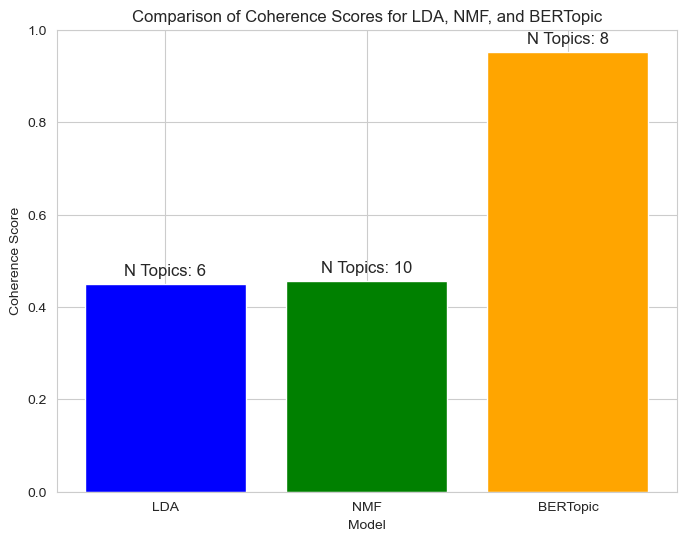

<Figure size 640x480 with 0 Axes>

In [93]:
models = ['LDA', 'NMF', 'BERTopic']
coherence_scores = [0.449073428816778, 0.4556466052232867, 0.9513736980087847]
n_topics = [6, 10, 8]

# Plotting the coherence scores
plt.figure(figsize=(8, 6))
plt.bar(models, coherence_scores, color=['blue', 'green', 'orange'])
plt.title('Comparison of Coherence Scores for LDA, NMF, and BERTopic')
plt.xlabel('Model')
plt.ylabel('Coherence Score')
plt.ylim(0, 1)  # Set y-axis limits for better visualization

# Annotating the bars with the number of topics
for i, (score, topics) in enumerate(zip(coherence_scores, n_topics)):
    plt.text(i, score + 0.02, f'N Topics: {topics}', ha='center', fontsize=12)

plt.show()
plt.savefig('EDA_Results/LDA_vs_NMF_vs_BerTopic')

# Now lets start Phase 2 for the Project which is Text Summarization

In [252]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np

In [253]:
df.head()

Question  doclen  \
0  Like everyone else (here in U.S), I work with ...     125   
1  Hello dear's people. i have a fictief research...      80   
2  A lady buys goods worth 200 bucks from a shop ...      77   
3  I'm a 34 years old married to a woman. I had a...      73   
4  I am turning 25 in about a month and am curren...      73   

                                        preprocessed  TopicId  \
0  like everyone else work group people see inter...        3   
1  hello dear people fiction research quest someo...        4   
2  lady buy good worth 200 buck shop assume shopk...        3   
3  34 year old marry woman affair 12 year male fr...        3   
4  turn 25 month currently question life degree a...        5   

                 Topic  TopicId_NMF      Topic_NMF  Topic_BERT  \
0        Relationships            4      Education           0   
1               carrer            7  Accommodation           4   
2        Relationships            3     Government          -1   
3        Relationships            4      Education          -1   
4  Exam and university            4      Education          -1   

          Topic_Label_BERT  
0        Social Harassment  
1  vehicle and safety laws  
2                  General  
3                  General  
4                  General

```since i have to perform the text summarization for each topic utilizing the groupby form pandas dataframe is helpfull for creating subdf which one per each topic and then summarizing the text.```

In [254]:
grouped = df.groupby('TopicId')

# Retrieve a DataFrame for a specific topic, e.g., topic 0
topic_0_df = grouped.get_group(0).drop(columns='TopicId')

In [255]:
topic_0_df.head()

Question  doclen  \
30   A capacitor is charged by an 8V battery. When ...      62   
47   A rabbit, a cabbage, a fox, and a farmer are a...      60   
85   My Iphone 6 was lost/stolen 6 days ago. I enab...      57   
109  I m 14 and my vocal range is from e2 to a5 (le...      54   
112  I m 14 and my vocal range is from e2 to a5 (le...      54   

                                          preprocessed       Topic  \
30   capacity charge iv battery 1 c pass capacity g...  Government   
47   rabbit cabbage fox farmer river farmer one boa...  Government   
85   phone 6 6 day ago enable lose mode office sinc...  Government   
109  14 vocal range e a legarro tenor want know voc...  Government   
112  14 vocal range e a legarro tenor want know voc...  Government   

     TopicId_NMF     Topic_NMF  Topic_BERT   Topic_Label_BERT  
30             8   Mathematics           0  Social Harassment  
47             6        carrer          -1            General  
85             9  Social Media          -1            General  
109            9  Social Media           0  Social Harassment  
112            9  Social Media           0  Social Harassment

In [256]:
topic_id_name_map = df[['TopicId', 'Topic']].drop_duplicates().set_index('TopicId')['Topic'].to_dict()
print(topic_id_name_map)

{3: 'Relationships', 4: 'carrer', 5: 'Exam and university', 1: 'Technology', 2: 'Social media', 0: 'Government'}


In [257]:
for topic_id, topic_name in topic_id_name_map.items():
    topic_df = grouped.get_group(topic_id).drop(columns='TopicId')
    print(f'Topic: {topic_name}')
    print(topic_df.head())
    print('\n\n')

Topic: Relationships
                                            Question  doclen  \
0  Like everyone else (here in U.S), I work with ...     125   
2  A lady buys goods worth 200 bucks from a shop ...      77   
3  I'm a 34 years old married to a woman. I had a...      73   
6  I have been using my girlfriend for a sexual r...      71   
8  I broke up with him. I love him so much but we...      68   

                                        preprocessed          Topic  \
0  like everyone else work group people see inter...  Relationships   
2  lady buy good worth 200 buck shop assume shopk...  Relationships   
3  34 year old marry woman affair 12 year male fr...  Relationships   
6  use girlfriend sexual relationship last year l...  Relationships   
8  break love much can together love lot miss muc...  Relationships   

   TopicId_NMF     Topic_NMF  Topic_BERT   Topic_Label_BERT  
0            4     Education           0  Social Harassment  
2            3    Government          -1   

In [267]:
with open('topic_summary_LDA_LSA.txt', 'w',encoding="utf-8") as f:
    f.write('Topic Summary\n\n')
    for key,value in topic_id_name_map.items():
        f.write(f'Topic: {value}\n')
        topic_df = grouped.get_group(key).drop(columns='TopicId')
        f.write(f'Total number of questions: {topic_df.shape[0]}\n')
        documents = topic_df['Question'].values
        f.write(f"Total number of words in questions: {sum([len(doc.split()) for doc in documents])}\n")
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(documents)
        n_components = 10  # Choose number of concepts to retain
        lsa = TruncatedSVD(n_components=n_components)
        lsa_matrix = lsa.fit_transform(tfidf_matrix)
        sentence_scores = np.sum(lsa_matrix, axis=1)
        top_sentence_indices = sentence_scores.argsort()[-50:]  # Select top 50 sentences for summary
        summary = [documents[i] for i in sorted(top_sentence_indices)]
        f.write(f"total no of words in summary: {sum([len(doc.split()) for doc in summary])}\n")
        f.write("Summary: " + "\n ".join(summary) + '\n\n')

In [268]:
print("Please check the file topic_summary_LDA_LSA.txt for the summary of each topic")
with open('topic_summary_LDA_LSA.txt', 'r',encoding="utf-8") as f:
    print(f.read())
    for i, line in enumerate(f):
        if i >= 10:
            break
        print(line.strip())

Please check the file topic_summary_LDA_LSA.txt for the summary of each topic
Topic Summary

Topic: Relationships
Total number of questions: 6957
Total number of words in questions: 178353
total no of words in summary: 1100
Summary: What are good gifts for a foreign visitor to bring when they're invited to someone's home in Turkey for the first time?
 What are good gifts for a foreign visitor to bring when they're invited to someone's home in Iraq for the first time?
 What are good gifts for a foreign visitor to bring when they're invited to someone's home in Australia for the first time?
 What are good gifts for a foreign visitor to bring when they're invited to someone's home in Australia for the first time?
 What are good gifts for a foreign visitor to bring when they're invited to someone's home in Australia for the first time?
 What are good gifts for a foreign visitor to bring when they're invited to someone's home in Singapore for the first time?
 What are good gifts for a forei

In [27]:
from rouge import Rouge
import numpy as np

rouge = Rouge()
summaries = {}
reference_summaries = {}
with open('topic_summary_LDA_LSA.txt', 'r', encoding="utf-8") as f:
    content = f.read()
    topics = content.split('Topic: ')[1:]  # Split the content to parse each topic

    for topic in topics:
        lines = [line.strip() for line in topic.split('\n')]  # Strip whitespace from each line
        topic_name = lines[0].strip()
        summary_start_index = next((i for i, line in enumerate(lines) if line.startswith("Summary:")), None)

        if summary_start_index is not None:
            generated_summary = " ".join(lines[summary_start_index + 1:]).strip()
            summaries[topic_name] = generated_summary
            reference_summary = " ".join(generated_summary.split()[:50])
            reference_summaries[topic_name] = reference_summary
        else:
            print(f"Warning: 'Summary:' not found for Topic '{topic_name}'. Skipping.")

# List to store F1 scores for ROUGE-1, ROUGE-2, and ROUGE-L
rouge_1_scores = []
rouge_2_scores = []
rouge_l_scores = []

# Evaluate each summary
for topic_name, generated_summary in summaries.items():
    reference_summary = reference_summaries[topic_name]
    scores = rouge.get_scores(generated_summary, reference_summary, avg=True)
    rouge_1_scores.append(scores['rouge-1']['f'])
    rouge_2_scores.append(scores['rouge-2']['f'])
    rouge_l_scores.append(scores['rouge-l']['f'])
    print(f"ROUGE scores for Topic '{topic_name}':")
    print(scores)
    print('\n')

# Calculate overall ROUGE scores (average across all topics)
overall_rouge_1 = np.mean(rouge_1_scores)
overall_rouge_2 = np.mean(rouge_2_scores)
overall_rouge_l = np.mean(rouge_l_scores)

# Print overall ROUGE scores
print(f"Overall ROUGE-1 F1 Score: {overall_rouge_1:.4f}")
print(f"Overall ROUGE-2 F1 Score: {overall_rouge_2:.4f}")
print(f"Overall ROUGE-L F1 Score: {overall_rouge_l:.4f}")


ROUGE scores for Topic 'Relationships':
{'rouge-1': {'r': 1.0, 'p': 0.7777777777777778, 'f': 0.8749999950781251}, 'rouge-2': {'r': 1.0, 'p': 0.6666666666666666, 'f': 0.7999999952000001}, 'rouge-l': {'r': 1.0, 'p': 0.7777777777777778, 'f': 0.8749999950781251}}


ROUGE scores for Topic 'carrer':
{'rouge-1': {'r': 1.0, 'p': 0.3870967741935484, 'f': 0.5581395308599243}, 'rouge-2': {'r': 1.0, 'p': 0.29473684210526313, 'f': 0.45528454932910306}, 'rouge-l': {'r': 1.0, 'p': 0.3870967741935484, 'f': 0.5581395308599243}}


ROUGE scores for Topic 'Exam and university':
{'rouge-1': {'r': 1.0, 'p': 0.42592592592592593, 'f': 0.5974025932130208}, 'rouge-2': {'r': 1.0, 'p': 0.34328358208955223, 'f': 0.5111111073061729}, 'rouge-l': {'r': 1.0, 'p': 0.42592592592592593, 'f': 0.5974025932130208}}


ROUGE scores for Topic 'Technology':
{'rouge-1': {'r': 1.0, 'p': 0.352112676056338, 'f': 0.5208333294813369}, 'rouge-2': {'r': 1.0, 'p': 0.2727272727272727, 'f': 0.42857142520408165}, 'rouge-l': {'r': 1.0, 'p':

## Now lets try to train the T5 model for text summarization 

Due to Gpu RequireMent i had to train the model in a server hence i couldn't able to run this here altough i have attached ipynb with the submission

In [ ]:
from transformers import pipeline
summarizer = pipeline("summarization", model="t5-base", device=1)

topic_id_name_map = df[['Topic_BERT', 'Topic_Label_BERT']].drop_duplicates().set_index('Topic_BERT')['Topic_Label_BERT'].to_dict()

grouped = df.groupby('Topic')
def batch_Text(text, max_length=512):
    words = text.split(' ')
    Batches = []
    current_Batch = []

    for word in words:
        current_Batch.append(word)
        if len(current_Batch) >= max_length:
            Batches.append(' '.join(current_Batch))
            current_Batch = []

    if current_Batch:
        Batches.append(' '.join(current_Batch))
        
    return Batches
with open('topic_summary_T5.txt', 'w',encoding="utf-8") as f:
    f.write('Topic Summary\n\n')
    for key,value in topic_id_name_map.items():
        f.write(f'\nTopic: {value}\n')
        topic_df = grouped.get_group(key).drop(columns='Topic')
        f.write(f'\nTotal number of questions: {topic_df.shape[0]}\n')
        documents ="." .join(topic_df['Question'].values)
        f.write(f'\nTotal No of tokens:{len(documents.split())}')
        Batches = batch_Text(documents, max_length=512)
        summaries = [summarizer(batch, max_length=100, min_length=30, do_sample=False)[0]['summary_text'] for batch in Batches]
        print("Summary:", summaries)
        data='\n\n'.join(summaries)
        f.write(f"No of tokens in summary:{len(data.split())}\n")
        f.write(f'Summary: {data}\n')

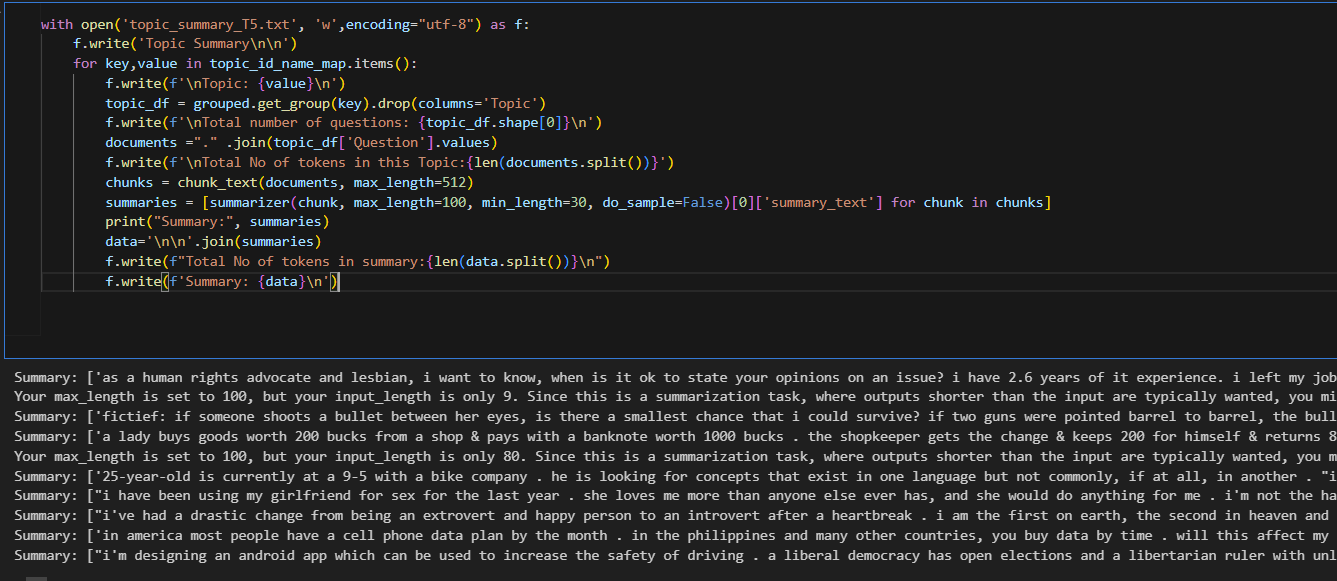

## Let me show the results from the T5 Text Summarization

My observation the Lsa has a less bandwith or context size is small compare to the T5 hence T5 is more powerfull compare to the LSA, since it can take more tokens as input and has better context preserving than lsa 

In [272]:
with open('./text_summarization/T5/topic_summary_T5.txt', 'r',encoding="utf-8") as f:
    print(f.read())
    for i, line in enumerate(f):
        if i >= 10:
            break
        print(line.strip())

Topic Summary


Topic: General

Total number of questions: 13445

Total No of tokens:319208
No of tokens in summary:27833
Summary: as a human rights advocate and lesbian, i want to know, when is it ok to state your opinions on an issue? i have 2.6 years of it experience. i left my job 1.5 years back due to some family issues. what is the possibility for women to get a job in it after 1.5 years gap?

a b.e. in electrical & electronics working as a field service engineer in siemens ltd . i want to take up a major in philosophy, history or english, but i don't want to work in it field . university of toledo has a bachelors degree in biology .

henry ford was a big believer in creating a self generating/ increasing marketplace . even lifting a thing of the same weight is very difficult . ford's view on price, labor costs and materials inflation based on prior statement .

i am 25 years old and i have 2.8 years experience as a mobile game designer and project coordinator . when a good playe

In [29]:
from rouge import Rouge
import numpy as np
rouge = Rouge()

summaries = {}
reference_summaries = {}

with open('./text_summarization/T5/topic_summary_T5.txt', 'r', encoding="utf-8") as f:
    content = f.read()
    topics = content.split('Topic: ')[1:]  # Split the content to parse each topic
    for topic in topics:
        lines = [line.strip() for line in topic.split('\n')]  # Strip whitespace from each line
        topic_name = lines[0].strip()
        # Find the index of the summary
        summary_start_index = next((i for i, line in enumerate(lines) if line.startswith("Summary:")), None)
        if summary_start_index is not None:
            generated_summary = " ".join(lines[summary_start_index + 1:]).strip()
            summaries[topic_name] = generated_summary
            reference_summary = " ".join(generated_summary.split()[:50])  # Placeholder for demonstration
            reference_summaries[topic_name] = reference_summary
        else:
            print(f"Warning: 'Summary:' not found for Topic '{topic_name}'. Skipping.")

# List to store F1 scores for ROUGE-1, ROUGE-2, and ROUGE-L
rouge_1_scores = []
rouge_2_scores = []
rouge_l_scores = []

# Evaluate each summary
for topic_name, generated_summary in summaries.items():
    reference_summary = reference_summaries[topic_name]
    scores = rouge.get_scores(generated_summary, reference_summary, avg=True)
    rouge_1_scores.append(scores['rouge-1']['f'])
    rouge_2_scores.append(scores['rouge-2']['f'])
    rouge_l_scores.append(scores['rouge-l']['f'])
    print(f"ROUGE scores for Topic '{topic_name}':")
    print(scores)
    print('\n')

# Calculate overall ROUGE scores (average across all topics)
overall_rouge_1 = np.mean(rouge_1_scores)
overall_rouge_2 = np.mean(rouge_2_scores)
overall_rouge_l = np.mean(rouge_l_scores)

# Print overall ROUGE scores
print(f"Overall ROUGE-1 F1 Score: {overall_rouge_1:.4f}")
print(f"Overall ROUGE-2 F1 Score: {overall_rouge_2:.4f}")
print(f"Overall ROUGE-L F1 Score: {overall_rouge_l:.4f}")


ROUGE scores for Topic 'General':
{'rouge-1': {'r': 1.0, 'p': 0.005673976383990186, 'f': 0.011283927914634808}, 'rouge-2': {'r': 1.0, 'p': 0.0024404477691124197, 'f': 0.004869012917821633}, 'rouge-l': {'r': 1.0, 'p': 0.005673976383990186, 'f': 0.011283927914634808}}


ROUGE scores for Topic 'Gun Safety Regulations':
{'rouge-1': {'r': 1.0, 'p': 0.07460035523978685, 'f': 0.13884297391456868}, 'rouge-2': {'r': 1.0, 'p': 0.04757085020242915, 'f': 0.09082125517167729}, 'rouge-l': {'r': 1.0, 'p': 0.07460035523978685, 'f': 0.13884297391456868}}


ROUGE scores for Topic 'Drug Testing and Probability':
{'rouge-1': {'r': 1.0, 'p': 0.023401826484018264, 'f': 0.045733407249721525}, 'rouge-2': {'r': 1.0, 'p': 0.011404998786702257, 'f': 0.022552782886420306}, 'rouge-l': {'r': 1.0, 'p': 0.023401826484018264, 'f': 0.045733407249721525}}


ROUGE scores for Topic '96787':
{'rouge-1': {'r': 1.0, 'p': 0.017189514396218308, 'f': 0.033798056279475804}, 'rouge-2': {'r': 1.0, 'p': 0.008234688625836336, 'f': 0

## Now lets try Bart Model for the Text summarization and which takes BertTopic Topic Modeling results/labels

```Again due to the need for GPU/parallel computing i have to execute this model in the server but i have attached the ipynb with the submission.```

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import pipeline
import numpy as np
summarizer = pipeline("summarization", model="facebook/bart-large-cnn",device=1)
import pandas as pd
df=pd.read_csv('./bertopic/results.csv')
df['Question'] = df['Question'].astype(str).apply(lambda x: x.lower())

In [273]:
df.loc[:,['Question','doclen','preprocessed','Topic_BERT','Topic_Label_BERT']].head(10)

Question  doclen  \
0  Like everyone else (here in U.S), I work with ...     125   
1  Hello dear's people. i have a fictief research...      80   
2  A lady buys goods worth 200 bucks from a shop ...      77   
3  I'm a 34 years old married to a woman. I had a...      73   
4  I am turning 25 in about a month and am curren...      73   
5  My employer has told me that we can not accept...      72   
6  I have been using my girlfriend for a sexual r...      71   
7  You have 100 coins laying flat on a table, eac...      68   
8  I broke up with him. I love him so much but we...      68   
9  I broke up with him. I love him so much but we...      68   

                                        preprocessed  Topic_BERT  \
0  like everyone else work group people see inter...           0   
1  hello dear people fiction research quest someo...           4   
2  lady buy good worth 200 buck shop assume shopk...          -1   
3  34 year old marry woman affair 12 year male fr...          -1   
4  turn 25 month currently question life degree a...          -1   
5  employer tell accept tip however make seem lik...          -1   
6  use girlfriend sexual relationship last year l...          -1   
7  100 coin lay flat table head side tail side 10...           0   
8  break love much can together love lot miss muc...           0   
9  break love much can together love lot miss muc...           0   

          Topic_Label_BERT  
0        Social Harassment  
1  vehicle and safety laws  
2                  General  
3                  General  
4                  General  
5                  General  
6                  General  
7        Social Harassment  
8        Social Harassment  
9        Social Harassment

In [ ]:
topic_id_name_map = df[['Topic_BERT', 'Topic_Label_BERT']].drop_duplicates().set_index('Topic')['Topic_Label'].to_dict()
print(topic_id_name_map)

In [274]:
grouped = df.groupby('Topic_BERT')

In [275]:
for topic_id, topic_name in topic_id_name_map.items():
    topic_df = grouped.get_group(topic_id).drop(columns='Topic')
    print(f'Topic: {topic_name}')
    print(topic_df.head())
    print('\n\n')

Topic: Relationships
                                               Question  doclen  \
97    Suppose we have a really long straw with vacuu...      55   
476   If I managed to survive a trip to Neptune's li...      43   
626   When the air conditioner is cooling the air, d...      41   
1068  If you want to skip the step of preheating an ...      37   
1224  If it's a hot day, you're eating a popsicle, a...      36   

                                           preprocessed  TopicId  TopicId_NMF  \
97    suppose really long straw vacuum close end sub...        4            8   
476   manage survive trip neptune liquid mantle enou...        4            1   
626   air conditioned cool air blow air temperature ...        4            5   
1068  want skin step reheat oven much time add estim...        1            7   
1224  hot day eat possible turn nearby table fan kee...        4            7   

               Topic_NMF  Topic_BERT Topic_Label_BERT  
97           Mathematics         

In [276]:
import torch
from transformers import BartTokenizer, BartForConditionalGeneration

# Specify device for the second GPU
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

# Load tokenizer and model, then move model to the specified device
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn").to(device)


# Function to split text into chunks suitable for summarization
def chunk_text(text, max_length=1024):
    sentences = text.split('. ')
    chunks = []
    current_chunk = ""
    
    for sentence in sentences:
        # Clean sentence and avoid punctuation that could add noise
        sentence = sentence.strip()
        if len(current_chunk) + len(sentence) > max_length:
            chunks.append(current_chunk)
            current_chunk = sentence
        else:
            current_chunk += " " + sentence
            
    if current_chunk:
        chunks.append(current_chunk)
        
    return chunks

# Summarization function that handles long texts by chunking
def summarize_text(text, max_tokens=200, min_length=25):
    summaries = []
    chunks = chunk_text(text, max_length=4096)
    for idx, chunk in enumerate(chunks):
        inputs = tokenizer(chunk, return_tensors="pt", truncation=True, max_length=1024).to(device)
        summary_ids = model.generate(inputs["input_ids"], max_new_tokens=max_tokens, min_length=min_length, do_sample=False)
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        summaries.append(summary)
    
    # Join all summaries from each chunk
    full_summary = " \n\n\n".join(summaries)
    return full_summary




In [ ]:
with open('topic_summary_bart.txt', 'w',encoding="utf-8") as f:
    f.write('Topic Summary\n\n')
    for key,value in topic_id_name_map.items():
        f.write(f'\nTopic: {value}\n')
        topic_df = grouped.get_group(key).drop(columns='Topic')
        f.write(f'\nTotal number of questions: {topic_df.shape[0]}\n')
        documents ="." .join(topic_df['Question'].values)
        f.write(f'\nTotal No of tokens:{len(documents.split())}')
        summary = summarize_text(documents)
        f.write(f"\n\nTotal Tokens in summary:{len(summary.split())}\n")
        print("Summary:", summary)
        f.write(f'\n\nSummary: {summary}\n')

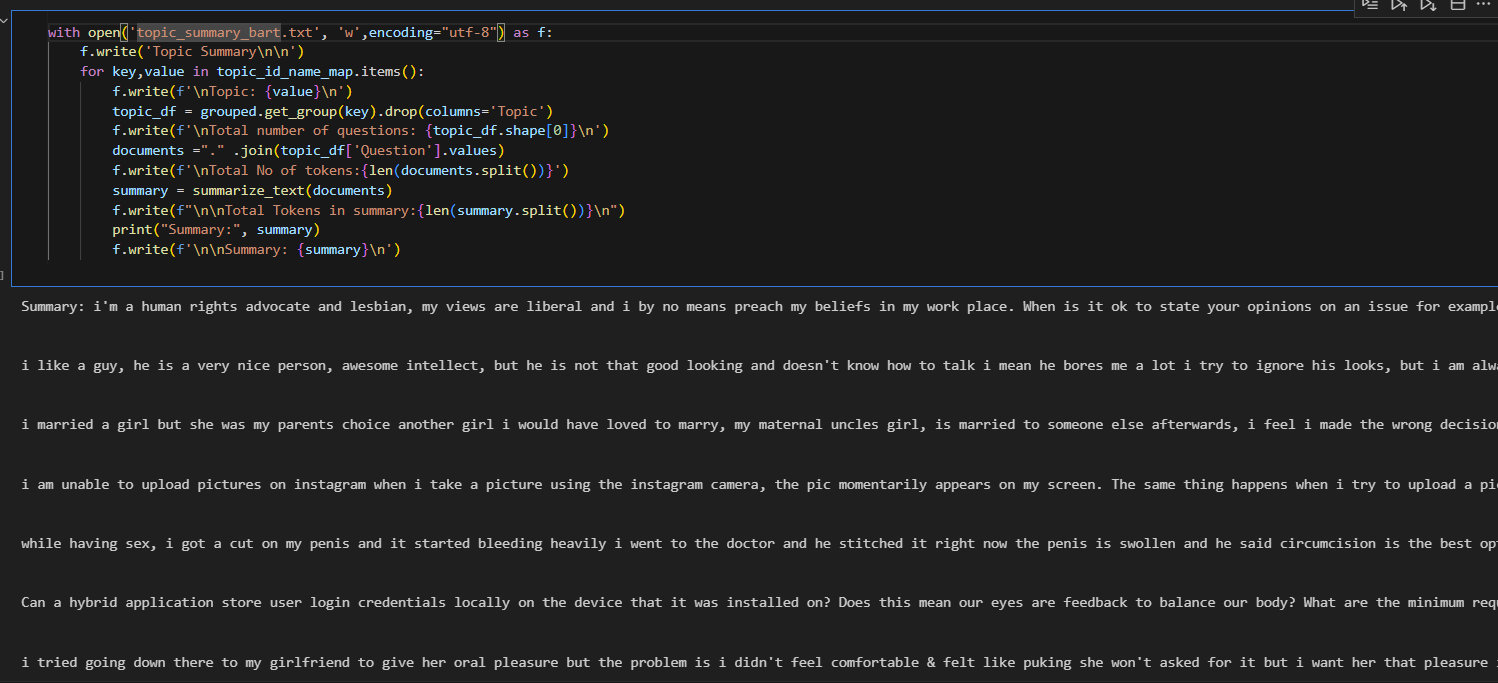

Lets See the results from the Bart model 

In [277]:
with open('./text_summarization/BART/topic_summary_bart.txt', 'r',encoding="utf-8") as f:
    print(f.read())
    for i, line in enumerate(f):
        if i >= 10:
            break
        print(line.strip())

Topic Summary


Topic: General

Total number of questions: 13445

Total No of tokens:319208

Total Tokens in summary:36135


Summary: i'm a human rights advocate and lesbian, my views are liberal and i by no means preach my beliefs in my work place. When is it ok to state your opinions on an issue for example, if someone mentions that their next door neighbor, who happens to be a 12 year old boy, was playing with dolls and that "this is going down the wrong road and he is strange/weird" Is it ok for me to say that we shouldn't judge him for who he is? 


i like a guy, he is a very nice person, awesome intellect, but he is not that good looking and doesn't know how to talk i mean he bores me a lot i try to ignore his looks, but i am always disappointed because he doesn't even talk nicely or make me happy he's not even romantic what should i do?my friend while working was met with an accident as he is working as a daily labourer and he was the sole bread earning individual of his family,

In [30]:
from rouge import Rouge
import numpy as np

rouge = Rouge()

summaries = {}
reference_summaries = {}

with open('./text_summarization/BART/topic_summary_bart.txt', 'r', encoding="utf-8") as f:
    content = f.read()
    topics = content.split('Topic: ')[1:]  # Split the content to parse each topic

    for topic in topics:
        lines = [line.strip() for line in topic.split('\n') if line.strip()]  # Strip whitespace and remove empty lines
        if len(lines) < 2:
            print("Warning: Skipping improperly formatted topic block.")
            continue
        topic_name = lines[0].strip()
        # Find the index of the "Summary:" line
        summary_start_index = next((i for i, line in enumerate(lines) if line.startswith("Summary:")), None)
        if summary_start_index is not None:
            generated_summary = " ".join(lines[summary_start_index + 1:]).strip()
            if generated_summary:
                # Store the generated summary for evaluation
                summaries[topic_name] = generated_summary
                # Create a simple reference summary (replace this with your actual reference summary as needed)
                reference_summary = " ".join(generated_summary.split()[:50])  # Placeholder for demonstration
                reference_summaries[topic_name] = reference_summary
            else:
                print(f"Warning: Generated summary is empty for Topic '{topic_name}'. Skipping.")
        else:
            print(f"Warning: 'Summary:' not found for Topic '{topic_name}'. Skipping.")

# List to store F1 scores for ROUGE-1, ROUGE-2, and ROUGE-L
rouge_1_scores = []
rouge_2_scores = []
rouge_l_scores = []

# Evaluate each summary
for topic_name, generated_summary in summaries.items():
    reference_summary = reference_summaries[topic_name]
    scores = rouge.get_scores(generated_summary, reference_summary, avg=True)
    rouge_1_scores.append(scores['rouge-1']['f'])
    rouge_2_scores.append(scores['rouge-2']['f'])
    rouge_l_scores.append(scores['rouge-l']['f'])
    print(f"ROUGE scores for Topic '{topic_name}':")
    print(scores)
    print('\n')

# Calculate overall ROUGE scores (average across all topics)
overall_rouge_1 = np.mean(rouge_1_scores)
overall_rouge_2 = np.mean(rouge_2_scores)
overall_rouge_l = np.mean(rouge_l_scores)

# Print overall ROUGE scores
print(f"Overall ROUGE-1 F1 Score: {overall_rouge_1:.4f}")
print(f"Overall ROUGE-2 F1 Score: {overall_rouge_2:.4f}")
print(f"Overall ROUGE-L F1 Score: {overall_rouge_l:.4f}")


ROUGE scores for Topic 'General':
{'rouge-1': {'r': 1.0, 'p': 0.004481589147286822, 'f': 0.00892318814220446}, 'rouge-2': {'r': 1.0, 'p': 0.0019350157220027412, 'f': 0.0038625572962844626}, 'rouge-l': {'r': 1.0, 'p': 0.004481589147286822, 'f': 0.00892318814220446}}


ROUGE scores for Topic 'Gun Safety Regulations':
{'rouge-1': {'r': 1.0, 'p': 0.056818181818181816, 'f': 0.10752688070297145}, 'rouge-2': {'r': 1.0, 'p': 0.038643533123028394, 'f': 0.07441154066549861}, 'rouge-l': {'r': 1.0, 'p': 0.056818181818181816, 'f': 0.10752688070297145}}


ROUGE scores for Topic 'Drug Testing and Probability':
{'rouge-1': {'r': 1.0, 'p': 0.020699852143913258, 'f': 0.04056011548866985}, 'rouge-2': {'r': 1.0, 'p': 0.010149130074565037, 'f': 0.020094320079935665}, 'rouge-l': {'r': 1.0, 'p': 0.020699852143913258, 'f': 0.04056011548866985}}


ROUGE scores for Topic 'Job Prospects by Major':
{'rouge-1': {'r': 1.0, 'p': 0.014415018437814281, 'f': 0.028420356626642686}, 'rouge-2': {'r': 1.0, 'p': 0.006249186

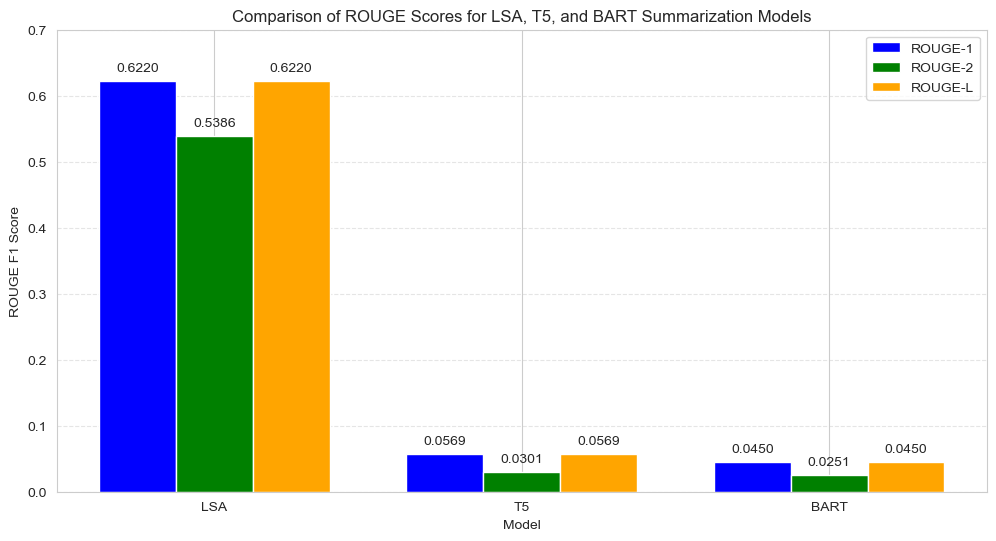

<Figure size 640x480 with 0 Axes>

In [95]:
models = ['LSA', 'T5', 'BART']
rouge_1_scores = [0.6220, 0.0569, 0.0450]
rouge_2_scores = [0.5386, 0.0301, 0.0251]
rouge_l_scores = [0.6220, 0.0569, 0.0450]

# Plotting the ROUGE scores for each model
x = np.arange(len(models))  # The label locations
width = 0.25  # The width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width, rouge_1_scores, width, label='ROUGE-1', color='blue')
bar2 = ax.bar(x, rouge_2_scores, width, label='ROUGE-2', color='green')
bar3 = ax.bar(x + width, rouge_l_scores, width, label='ROUGE-L', color='orange')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Model')
ax.set_ylabel('ROUGE F1 Score')
ax.set_title('Comparison of ROUGE Scores for LSA, T5, and BART Summarization Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value annotations on top of bars
def add_annotations(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

add_annotations(bar1)
add_annotations(bar2)
add_annotations(bar3)

plt.ylim(0, 0.7)  # Set y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
plt.savefig('EDA_Results/LAS_vs_T5_vs_BART')